**Run all the cells below to make sure everything is working and ready to go. All cells should run without error.**

### Test Matplotlib and Plotting

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import os
import math
%matplotlib inline
# import the libraries

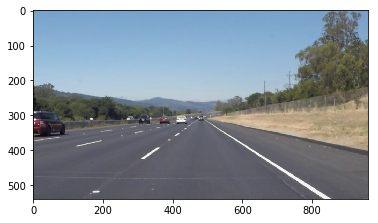

In [2]:
toprocess_img = mpimg.imread('/Users/vijayasarathibalasubramanian/Desktop/SDN/CarND-LaneLines-P1/test_images/SolidWhiteRight.jpg')
plt.imshow(toprocess_img)
#This is to test if the image library functions are working

In [3]:
def load_roads(path):
    imr=mpimg.imread(path)
    return imr

In [4]:
def grayscale(img):
    gs =cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    return gs

# function to create a grayscale image

In [5]:
def gaussian_blur(img,kernal_size):
    return cv2.GaussianBlur(img,(kernal_size,kernal_size),0)

In [6]:
def canny(img,low_threshold,high_threshold):
    return cv2.Canny(img,low_threshold,high_threshold)

In [7]:
def region_of_interest(img,vertices):
    mask=np.zeros_like(img)
    #color_edges = np.dstack((edges, edges, edges))
    if len(img.shape) > 4:
        channel_count =img.shape[2]
        ignore_mask_color =(255,) * channel_count
    else:
        ignore_mask_color = 255
    
    cv2.fillPoly(mask,vertices,255)
    masked_edges=cv2.bitwise_and(img,mask)
    
    return masked_edges

In [8]:
def draw_lines(img,lines,color=[255,0,0],thickness=10):
    #for line in lines :
    #    for x1,y1,x2,y2 in line:
    #        cv2.line(img,(x1,y1),(x2,y2),color,thickness)
    
    img_xy=img.shape 
    imshape = [img_xy[0], img_xy[1]]  
    psp = []
    nsp = []
    psi = []
    nsi = []
    
    for line in lines:
        for x1,y1,x2,y2 in line:            
            m = (y1-y2)/(x1-x2) # slope
            l = math.sqrt((x1-x2)**2 + (y1-y2)**2) # lengh
            if not math.isnan(m):
                if m > 0:
                    psp.append([x1, y1])
                    psp.append([x2, y2])
                    psi.append([m, y1-m*x1])
                elif m < 0:
                    nsp.append([x1, y1])
                    nsp.append([x2, y2])
                    nsi.append([m, y1-m*x1])
        


    psp = np.array(psp)
    nsp = np.array(nsp)

    # Get intercept and coefficient of fitted lines
    pos_coef, pos_intercept = fit_line(psi)
    neg_coef, neg_intercept = fit_line(nsi)

    inter_x_coord = (neg_intercept-pos_intercept)/(pos_coef-neg_coef)
    
    # call a function to draw lines
    draw_line(pos_coef, pos_intercept, inter_x_coord, img,imshape,color,thickness)
    draw_line(neg_coef, neg_intercept, inter_x_coord, img,imshape,color,thickness)

In [9]:
def draw_line(coef, b, inter_x, img, imshape, color, thickness):
    
    x1 = (int(inter_x), int(inter_x * coef + b))
    if coef > 0:
        x2 = (imshape[1], int(imshape[1] * coef + b))
    elif coef < 0:
        x2 = (0, int(0 * coef + b))
    cv2.line(img, x1,x2, color, thickness)

In [18]:
def fit_line(y):

    m1 = []
    b1 = []
    if len(y) == 1:
        return y[0][0], y[0][1]

    # Remove points with slope not within 1.5 standard deviations of the mean
    m_s = [pair[0] for pair in y]
    mean_m = np.mean(m_s)
    m_std = np.std(m_s)
    for pair in y:
        m = pair[0]
        if m - mean_m < 1.5 * m_std:
            m1.append(m)
            b1.append(pair[1])
    if not m1:
        m1 = m_s
        b1 = [pair[1] for pair in y]
    # Take estimate of slope, intercept to be the mean of remaining values
    m = np.mean(m1)
    b = np.mean(b1)
    
    return m, b

In [19]:
def hough_lines(img,rho,theta,threshold,min_line_len,max_line_gap):
    lines =cv2.HoughLinesP(img,rho,theta,threshold,np.array([]),min_line_len,max_line_gap)
    print(lines)
    line_img =np.zeros((img.shape[0],img.shape[1],3),dtype=np.uint8)
    draw_lines(line_img,lines)
    return line_img

In [20]:
def weighted_img(img,initial_img,alpha=0.8,beta=1.0):
    return cv2.addWeighted(initial_img,alpha,img,beta,0.0)

In [21]:
def process_image(image):
    kernal_size =7
    low_threshold=70
    high_threshold=150
    rho=2
    theta=np.pi/180
    threshold=50
    min_line_lenth=70
    max_line_gap=200
    line_image=np.copy(image)*0
    imshape =image.shape
    vertices =np.array([[(0,imshape[0]),(450, 300), (490,300),(imshape[1],imshape[0])]], dtype=np.int32)
    #vertices =np.array([[(0,imshape[0]),(450,380),(450,300),(imshape[1],imshape[0])]],dtype=np.int64)
    #vertices = np.array([[(0,imshape[0]),(450,290), (imshape[1],290), (imshape[1],imshape[0])]], dtype=np.int32)

    gray_img = grayscale(image) 

    gb_img = gaussian_blur(gray_img,kernal_size)
    #plt.imshow(gb_img)
    cany_img = canny(gb_img,low_threshold,high_threshold)
    region_of_int = region_of_interest(cany_img,vertices)
    
    hough_lines_img = hough_lines(region_of_int,rho,theta,threshold,min_line_lenth,max_line_gap)
    plt.imshow(hough_lines_img)
    result = weighted_img(hough_lines_img,image)
    return result

[[[481 310 877 538]]

 [[484 309 898 538]]

 [[293 462 486 300]]

 [[280 460 484 301]]

 [[485 309 897 537]]

 [[290 453 488 309]]

 [[483 310 798 492]]]


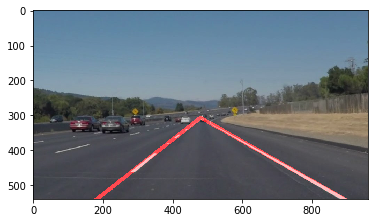

In [22]:

toprocess_img = mpimg.imread('/Users/vijayasarathibalasubramanian/Desktop/SDN/CarND-LaneLines-P1/test_images/solidWhiteCurve.jpg')
toprocess_img1 = mpimg.imread('/Users/vijayasarathibalasubramanian/Desktop/SDN/CarND-LaneLines-P1/test_images/solidYellowCurve2.jpg')
toprocess_img2 = mpimg.imread('/Users/vijayasarathibalasubramanian/Desktop/SDN/CarND-LaneLines-P1/test_images/solidWhiteRight.jpg')
toprocess_img3 = mpimg.imread('/Users/vijayasarathibalasubramanian/Desktop/SDN/CarND-LaneLines-P1/test_images/solidYellowCurve.jpg')
toprocess_img4 = mpimg.imread('/Users/vijayasarathibalasubramanian/Desktop/SDN/CarND-LaneLines-P1/test_images/whiteCarLaneSwitch.jpg')
toprocess_img5 = mpimg.imread('/Users/vijayasarathibalasubramanian/Desktop/SDN/CarND-LaneLines-P1/test_images/solidYellowLeft.jpg')

#solidYellowLeft whiteCarLaneSwitch



plt.imshow(process_image(toprocess_img))
#plt.imshow(process_image(toprocess_img1))
#plt.imshow(process_image(toprocess_img2))
#plt.imshow(process_image(toprocess_img3))
#plt.imshow(process_image(toprocess_img4))
#plt.imshow(process_image(toprocess_img5))


## Test Moviepy

In [23]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

Create a new video with `moviepy` by processing each frame to [YUV](https://en.wikipedia.org/wiki/YUV) color space.

[[[ 254  685  630  432]]

 [[ 281  685  568  477]]

 [[ 630  408 1093  675]]

 [[ 599  668  790  668]]

 [[ 408  487  676  416]]

 [[ 945  600 1073  677]]

 [[ 356  436  635  417]]

 [[ 267  686  649  429]]

 [[ 302  443  707  415]]

 [[ 188  544  368  496]]

 [[ 915  676 1090  676]]

 [[ 221  686  544  670]]

 [[ 301  439  634  416]]

 [[ 495  306 1066  677]]

 [[ 506  516  683  418]]

 [[ 205  685  380  682]]

 [[ 809  669 1065  677]]

 [[ 252  528  583  440]]

 [[ 675  419  937  595]]

 [[ 388  358  508  375]]

 [[ 595  438  720  422]]

 [[ 549  489  621  446]]

 [[ 297  443  680  416]]

 [[ 483  539  654  428]]

 [[ 963  677 1096  675]]

 [[ 400  359  875  504]]

 [[ 261  682  632  432]]

 [[ 385  371  851  496]]

 [[ 389  369  714  426]]

 [[ 260  686  598  669]]]
[MoviePy] >>>> Building video test_output.mp4
[MoviePy] Writing video test_output.mp4



  1%|          | 2/251 [00:00<00:13, 18.89it/s]

[[[ 254  685  630  432]]

 [[ 281  685  568  477]]

 [[ 630  408 1093  675]]

 [[ 599  668  790  668]]

 [[ 408  487  676  416]]

 [[ 945  600 1073  677]]

 [[ 356  436  635  417]]

 [[ 267  686  649  429]]

 [[ 302  443  707  415]]

 [[ 188  544  368  496]]

 [[ 915  676 1090  676]]

 [[ 221  686  544  670]]

 [[ 301  439  634  416]]

 [[ 495  306 1066  677]]

 [[ 506  516  683  418]]

 [[ 205  685  380  682]]

 [[ 809  669 1065  677]]

 [[ 252  528  583  440]]

 [[ 675  419  937  595]]

 [[ 388  358  508  375]]

 [[ 595  438  720  422]]

 [[ 549  489  621  446]]

 [[ 297  443  680  416]]

 [[ 483  539  654  428]]

 [[ 963  677 1096  675]]

 [[ 400  359  875  504]]

 [[ 261  682  632  432]]

 [[ 385  371  851  496]]

 [[ 389  369  714  426]]

 [[ 260  686  598  669]]]
[[[ 254  685  632  431]]

 [[ 276  685  642  429]]

 [[ 587  668  814  668]]

 [[ 306  438  633  415]]

 [[ 211  539  677  415]]

 [[ 187  545  576  441]]

 [[ 470  302 1009  638]]

 [[ 938  676 1090  676]]

 [[ 309  442


  2%|▏         | 6/251 [00:00<00:13, 18.65it/s]

[[[ 281  685  645  430]]

 [[ 296  444  703  416]]

 [[ 251  685  644  430]]

 [[ 185  547  577  442]]

 [[ 300  440  629  417]]

 [[ 591  668  792  668]]

 [[ 914  676 1091  676]]

 [[ 283  685  662  420]]

 [[ 262  684  380  602]]

 [[ 370  682  518  670]]

 [[ 387  493  692  417]]

 [[ 202  684  314  684]]

 [[ 500  309 1067  677]]

 [[ 278  523  664  420]]

 [[ 958  677 1081  677]]

 [[ 338  432  681  420]]

 [[ 225  686  567  669]]

 [[ 606  455  706  421]]

 [[ 263  683  396  681]]

 [[ 468  303  904  575]]

 [[ 409  362  875  504]]

 [[ 380  370  718  423]]

 [[ 395  360  865  503]]

 [[ 351  621  665  424]]

 [[ 830  669  904  674]]

 [[ 659  423  914  576]]

 [[ 375  373  717  427]]

 [[ 266  686  440  573]]

 [[ 582  441  714  420]]

 [[ 181  681  427  677]]]
[[[ 281  686  660  421]]

 [[ 261  685  636  432]]

 [[ 295  445  704  417]]

 [[ 305  440  628  417]]

 [[ 184  548  658  421]]

 [[ 577  669  829  669]]

 [[ 241  686  402  681]]

 [[ 943  677 1084  677]]

 [[ 279  672


  3%|▎         | 8/251 [00:00<00:12, 18.82it/s]

[[[ 283  685  661  420]]

 [[ 260  685  637  431]]

 [[ 297  444  709  416]]

 [[ 583  668  819  668]]

 [[ 186  548  662  420]]

 [[ 308  439  601  418]]

 [[ 275  676  436  676]]

 [[ 688  667 1001  677]]

 [[ 352  639  654  420]]

 [[ 488  307 1080  676]]

 [[ 288  684  653  419]]

 [[ 207  685  372  682]]

 [[ 268  686  630  433]]

 [[ 425  483  660  420]]

 [[ 183  549  281  524]]

 [[ 279  673  479  673]]

 [[ 389  681  574  669]]

 [[ 466  303 1018  634]]

 [[ 537  499  680  420]]

 [[ 506  310  843  537]]

 [[ 882  672 1086  676]]

 [[ 647  667  881  671]]

 [[ 264  686  402  590]]

 [[ 381  371  873  503]]

 [[ 480  672  760  667]]

 [[ 301  440  701  413]]

 [[ 534  502  634  432]]

 [[ 444  574  657  420]]

 [[ 936  676 1022  676]]

 [[ 402  361  714  427]]

 [[ 380  370  722  430]]

 [[ 441  366  727  426]]

 [[ 367  628  626  433]]

 [[ 400  361  718  440]]

 [[ 276  685  644  408]]

 [[ 393  360  723  448]]

 [[ 184  549  662  421]]

 [[ 346  682  531  670]]

 [[ 471  362


  4%|▍         | 10/251 [00:00<00:12, 18.88it/s]

[[[ 292  684  653  422]]

 [[ 291  669  629  433]]

 [[ 296  444  706  415]]

 [[ 628  667  758  667]]

 [[ 181  551  294  519]]

 [[ 338  507  650  423]]

 [[ 277  677  426  677]]

 [[ 300  440  699  412]]

 [[ 404  488  698  414]]

 [[ 230  686  403  680]]

 [[ 987  677 1079  677]]

 [[ 449  301 1096  674]]

 [[ 185  682  613  668]]

 [[ 309  438  699  411]]

 [[ 289  685  653  421]]

 [[ 494  308  896  569]]

 [[ 397  597  651  420]]

 [[ 306  517  557  446]]

 [[ 267  684  654  423]]

 [[ 842  669  955  676]]

 [[ 577  472  701  417]]

 [[ 813  668  940  676]]

 [[ 507  519  678  420]]

 [[ 394  360  855  500]]

 [[ 641  430  717  423]]

 [[ 459  361  870  502]]

 [[ 491  308 1081  676]]

 [[ 323  433  650  421]]

 [[ 301  683  634  432]]

 [[ 303  683  608  436]]

 [[ 375  370  728  426]]

 [[ 560  484  697  417]]

 [[ 395  382  499  369]]

 [[ 435  365  722  431]]]
[[[ 303  680  633  432]]

 [[ 272  684  648  421]]

 [[ 299  441  698  413]]

 [[ 617  667  757  667]]

 [[ 391  492


  5%|▍         | 12/251 [00:00<00:12, 18.58it/s]

[[[ 272  685  648  422]]

 [[ 292  685  650  425]]

 [[ 237  538  642  422]]

 [[ 473  305 1069  677]]

 [[ 295  445  704  417]]

 [[ 249  686  401  681]]

 [[ 605  668  790  668]]

 [[ 300  441  697  413]]

 [[ 953  677 1083  677]]

 [[ 363  636  654  424]]

 [[ 635  411 1092  675]]

 [[ 239  686  581  669]]

 [[ 589  466  710  417]]

 [[ 509  520  655  425]]

 [[ 813  669  927  676]]

 [[ 304  682  651  430]]

 [[ 646  422 1101  674]]

 [[ 543  451  704  416]]

 [[ 333  433  700  426]]

 [[ 291  673  486  673]]

 [[ 178  554  640  422]]

 [[ 455  363  858  501]]

 [[ 462  362  873  503]]

 [[ 556  487  697  415]]

 [[ 552  497  625  447]]

 [[ 304  441  697  414]]

 [[ 284  679  621  435]]

 [[ 474  305 1091  676]]

 [[ 386  360  849  493]]

 [[ 374  371  730  427]]

 [[ 292  672  505  672]]

 [[ 490  534  644  423]]

 [[ 354  643  658  430]]

 [[ 418  380  840  493]]

 [[ 443  429  706  429]]

 [[ 678  423 1084  676]]

 [[ 197  684  409  680]]

 [[ 545  495  619  449]]

 [[ 385  374


  6%|▌         | 14/251 [00:00<00:12, 18.38it/s]

[[[ 273  685  634  432]]

 [[ 292  685  644  430]]

 [[ 596  668  799  668]]

 [[ 481  307 1074  677]]

 [[ 339  438  695  413]]

 [[ 296  444  694  416]]

 [[ 960  677 1086  677]]

 [[ 364  499  573  443]]

 [[ 476  306 1091  675]]

 [[ 294  685  645  430]]

 [[ 271  685  633  432]]

 [[ 300  440  628  417]]

 [[ 225  686  548  670]]

 [[ 889  673 1085  670]]

 [[ 322  433  674  420]]

 [[ 501  310  975  617]]

 [[ 208  685  398  681]]

 [[ 181  552  293  521]]

 [[ 589  465  707  417]]

 [[ 313  514  698  410]]

 [[ 810  669  924  676]]

 [[ 302  438  697  410]]

 [[ 387  360  710  428]]

 [[ 590  440  709  421]]

 [[ 188  682  350  596]]

 [[ 424  365  718  427]]

 [[ 998  617 1092  675]]

 [[ 480  307 1071  676]]

 [[ 426  366  870  502]]

 [[ 597  460  693  417]]

 [[ 578  472  708  417]]

 [[ 647  667  872  671]]

 [[ 634  442  716  423]]]
[[[ 300  683  635  431]]

 [[ 594  668  807  668]]

 [[ 271  685  634  431]]

 [[ 180  552  470  469]]

 [[ 311  433  693  413]]

 [[ 301  439


  6%|▋         | 16/251 [00:00<00:12, 18.34it/s]

[[[ 298  684  636  430]]

 [[ 269  685  632  431]]

 [[ 300  442  691  415]]

 [[ 628  667  759  667]]

 [[ 223  545  533  451]]

 [[ 992  677 1083  677]]

 [[ 301  439  693  412]]

 [[ 279  679  663  420]]

 [[ 190  682  618  668]]

 [[ 233  686  404  680]]

 [[ 488  308 1077  676]]

 [[ 427  575  643  429]]

 [[ 613  435  691  416]]

 [[ 184  551  357  499]]

 [[ 229  543  615  418]]

 [[ 311  432  669  419]]

 [[ 453  302 1098  674]]

 [[ 205  550  391  490]]

 [[ 790  668  961  676]]

 [[ 544  493  695  409]]

 [[ 407  589  644  429]]

 [[ 273  684  635  431]]

 [[ 549  447  702  420]]

 [[ 681  416  780  496]]

 [[ 196  680  434  676]]

 [[ 341  504  694  409]]

 [[ 453  360  862  500]]

 [[ 809  668  979  676]]

 [[ 536  499  681  422]]

 [[ 420  364  715  426]]

 [[ 307  433  714  419]]

 [[ 447  360  852  499]]

 [[ 514  513  695  417]]

 [[ 199  678  457  674]]]
[[[296 685 634 431]]

 [[269 685 631 432]]

 [[297 443 690 415]]

 [[171 560 496 461]]

 [[273 685 636 431]]

 [[228


  7%|▋         | 18/251 [00:00<00:12, 18.33it/s]

[[[ 301  683  637  430]]

 [[ 607  667  790  667]]

 [[ 270  684  632  431]]

 [[ 480  465  667  415]]

 [[ 914  675 1030  677]]

 [[ 309  437  692  410]]

 [[ 183  549  437  477]]

 [[ 182  554  569  443]]

 [[ 298  442  689  414]]

 [[ 206  684  399  680]]

 [[ 272  684  667  418]]

 [[ 224  685  547  669]]

 [[ 271  684  665  418]]

 [[ 487  308 1077  676]]

 [[ 264  684  677  416]]

 [[ 507  310  815  517]]

 [[ 278  685  606  668]]

 [[ 265  684  644  429]]

 [[ 304  438  691  411]]

 [[ 565  478  699  416]]

 [[ 309  683  617  434]]

 [[ 413  363  862  500]]

 [[ 177  556  668  415]]

 [[1024  676 1098  674]]

 [[ 670  418 1068  676]]

 [[ 603  436  717  422]]

 [[ 256  685  688  415]]

 [[ 191  682  304  680]]

 [[ 311  433  615  412]]

 [[ 456  302 1080  676]]

 [[ 281  679  432  676]]

 [[ 446  364  865  500]]

 [[ 593  438  699  427]]

 [[ 545  493  630  431]]

 [[ 399  488  492  462]]

 [[ 452  364  724  432]]

 [[ 210  541  298  515]]]
[[[ 299  684  635  431]]

 [[ 275  684


  8%|▊         | 20/251 [00:01<00:12, 18.44it/s]

[[[ 277  684  621  434]]

 [[ 298  684  634  431]]

 [[ 638  667  730  667]]

 [[ 215  539  688  412]]

 [[ 303  437  690  410]]

 [[ 298  442  694  415]]

 [[ 266  685  608  668]]

 [[ 288  675  447  675]]

 [[ 779  668 1064  677]]

 [[ 215  544  324  514]]

 [[ 907  675 1035  677]]

 [[ 194  545  388  496]]

 [[ 319  510  675  414]]

 [[ 545  492  684  418]]

 [[ 503  310 1068  677]]

 [[ 302  683  637  431]]

 [[ 367  682  566  669]]

 [[ 263  685  662  416]]

 [[ 477  424  711  424]]

 [[ 668  431 1078  677]]

 [[ 216  685  519  670]]

 [[ 501  522  664  420]]

 [[ 386  379  845  493]]

 [[ 392  494  676  417]]

 [[ 233  686  394  680]]

 [[ 547  421  712  418]]

 [[ 294  671  523  671]]

 [[ 584  466  711  417]]

 [[ 360  430  871  502]]

 [[ 619  434  722  423]]

 [[ 303  438  710  417]]

 [[ 491  309 1080  677]]

 [[ 610  436  690  429]]

 [[ 408  365  608  454]]

 [[ 340  637  630  433]]

 [[ 291  673  477  673]]

 [[ 410  364  715  428]]

 [[ 367  633  665  416]]

 [[ 290  685


  9%|▉         | 22/251 [00:01<00:12, 18.39it/s]

[[[ 569  669  837  669]]

 [[ 296  685  632  432]]

 [[ 274  685  415  583]]

 [[ 245  686  401  681]]

 [[ 192  547  380  494]]

 [[ 289  675  453  675]]

 [[ 178  556  652  420]]

 [[ 301  439  705  418]]

 [[ 958  677 1081  677]]

 [[ 269  685  629  433]]

 [[ 459  425  709  425]]

 [[ 661  667  872  671]]

 [[ 653  421 1093  675]]

 [[ 301  684  655  417]]

 [[ 322  432  727  432]]

 [[ 301  443  606  417]]

 [[ 292  673  488  673]]

 [[ 479  466  673  417]]

 [[ 494  311  892  569]]

 [[ 176  556  384  493]]

 [[ 572  474  692  423]]

 [[ 513  313  898  572]]

 [[ 320  437  605  418]]

 [[ 421  483  664  422]]

 [[ 496  527  656  431]]

 [[ 366  439  606  418]]

 [[ 270  685  653  417]]

 [[ 299  684  659  422]]

 [[ 294  671  541  671]]

 [[ 447  303  517  314]]

 [[ 423  374  873  503]]

 [[ 631  444  708  429]]

 [[ 345  634  658  422]]

 [[ 402  364  712  424]]

 [[ 190  683  638  668]]

 [[ 783  668  953  676]]

 [[ 373  628  652  418]]]
[[[ 274  683  654  417]]

 [[ 300  683

[[[ 303  681  654  417]]

 [[ 272  684  653  417]]

 [[ 585  668  813  668]]

 [[ 916  676 1090  676]]

 [[ 861  550 1073  677]]

 [[ 287  674  733  667]]

 [[ 645  426  718  424]]

 [[ 297  443  688  415]]

 [[ 213  540  683  414]]

 [[ 307  437  603  416]]

 [[ 477  310 1009  629]]

 [[ 298  684  633  432]]

 [[ 203  684  387  681]]

 [[ 306  434  708  420]]

 [[ 420  482  684  411]]

 [[ 311  439  683  413]]

 [[ 495  311 1081  677]]

 [[ 290  672  501  672]]

 [[ 552  487  693  418]]

 [[ 581  442  696  426]]

 [[1007  677 1104  674]]

 [[ 213  685  284  685]]

 [[ 296  684  650  417]]

 [[ 619  449  707  429]]

 [[ 391  680  466  673]]

 [[ 301  439  707  418]]

 [[ 185  548  277  523]]

 [[ 511  313 1071  677]]

 [[ 660  667  860  670]]

 [[ 397  489  689  416]]

 [[ 420  367  864  502]]

 [[ 306  438  684  412]]

 [[ 612  436  715  429]]

 [[ 930  593 1075  677]]

 [[ 927  591 1009  626]]

 [[ 592  462  683  424]]

 [[ 279  681  617  436]]

 [[ 404  373  731  430]]

 [[ 744  667


 10%|▉         | 24/251 [00:01<00:13, 17.34it/s]

[[[ 273  683  653  417]]

 [[ 298  683  651  417]]

 [[ 183  549  643  417]]

 [[ 563  668  835  668]]

 [[ 480  310 1064  674]]

 [[ 356  681  541  669]]

 [[ 447  425  705  425]]

 [[ 933  585 1094  674]]

 [[ 269  684  638  426]]

 [[ 301  441  668  416]]

 [[ 302  438  598  417]]

 [[ 452  472  686  418]]

 [[ 915  675 1092  675]]

 [[ 287  674  733  667]]

 [[ 482  310  745  468]]

 [[ 177  555  610  423]]

 [[ 717  666 1058  677]]

 [[ 299  683  645  422]]

 [[ 670  424 1074  666]]

 [[ 220  685  310  683]]

 [[ 317  608  691  418]]

 [[ 543  492  688  418]]

 [[ 923  588 1071  677]]

 [[ 337  431  706  418]]

 [[ 373  412  727  431]]

 [[ 615  435  726  429]]

 [[ 429  361  865  502]]

 [[ 408  527  711  417]]

 [[ 685  423  823  523]]

 [[ 411  373  859  501]]

 [[ 446  304  517  314]]

 [[ 638  432  720  429]]

 [[ 194  682  625  667]]

 [[ 685  666 1027  677]]

 [[ 182  554  612  423]]

 [[ 311  435  669  417]]

 [[ 609  406 1093  674]]

 [[ 410  374  850  500]]]
[[[ 624  667


 11%|█         | 28/251 [00:01<00:13, 17.11it/s]

[[[ 268  684  647  418]]

 [[ 295  684  647  419]]

 [[ 665  666  860  669]]

 [[ 183  549  644  417]]

 [[ 355  437  706  418]]

 [[ 909  674 1030  676]]

 [[ 271  684  648  420]]

 [[ 312  434  665  416]]

 [[ 188  681  611  667]]

 [[ 890  672 1084  669]]

 [[ 299  683  631  433]]

 [[ 490  462  706  416]]

 [[ 216  685  351  682]]

 [[ 199  683  400  680]]

 [[ 611  452  705  414]]

 [[ 490  311 1074  676]]

 [[ 481  310 1063  673]]

 [[ 564  478  705  415]]

 [[ 851  545 1094  674]]

 [[ 452  426  726  431]]

 [[ 290  672  488  672]]

 [[ 433  361  866  501]]

 [[ 389  363  733  429]]

 [[ 244  685  586  668]]

 [[ 332  642  665  417]]

 [[ 631  424  705  420]]

 [[ 302  438  606  406]]

 [[ 278  681  498  522]]

 [[ 406  374  718  423]]

 [[ 685  423 1046  676]]

 [[ 570  407  641  443]]

 [[ 425  361  850  499]]

 [[ 446  304  517  314]]

 [[ 589  420  731  430]]

 [[ 899  673 1096  673]]]
[[[ 296  684  639  426]]

 [[ 272  685  641  417]]

 [[ 585  668  821  668]]

 [[ 182  550


 12%|█▏        | 30/251 [00:01<00:12, 17.16it/s]

[[[ 265  685  635  426]]

 [[ 307  434  661  415]]

 [[ 224  537  641  417]]

 [[ 585  668  822  668]]

 [[ 296  684  638  426]]

 [[ 271  684  656  425]]

 [[ 427  432  711  417]]

 [[ 912  675 1093  675]]

 [[ 283  675  766  667]]

 [[ 462  469  679  423]]

 [[ 264  685  662  417]]

 [[ 289  685  648  425]]

 [[ 304  436  414  434]]

 [[ 211  685  369  682]]

 [[ 292  685  636  426]]

 [[ 333  433  724  433]]

 [[ 475  310 1085  676]]

 [[ 851  669 1015  677]]

 [[ 630  667  883  671]]

 [[ 299  441  593  415]]

 [[ 551  486  688  422]]

 [[ 378  681  462  673]]

 [[ 496  313 1057  677]]

 [[ 428  361  858  500]]

 [[ 295  666  539  670]]

 [[ 360  432  686  427]]

 [[ 433  425  701  425]]

 [[ 389  364  869  501]]

 [[ 572  444  642  426]]

 [[ 935  676 1084  676]]

 [[ 668  428  824  518]]

 [[ 237  685  307  684]]

 [[ 313  434  703  414]]

 [[ 517  456  702  420]]

 [[ 272  683  639  426]]]
[[[ 636  667  744  667]]

 [[ 266  685  641  423]]

 [[ 293  684  575  472]]

 [[ 184  548


 13%|█▎        | 32/251 [00:01<00:12, 17.57it/s]

[[[ 291  685  634  426]]

 [[ 266  685  635  427]]

 [[ 184  548  398  487]]

 [[ 603  668  788  668]]

 [[ 306  436  697  415]]

 [[ 299  441  715  419]]

 [[ 271  686  597  669]]

 [[ 458  549  672  420]]

 [[ 956  677 1082  677]]

 [[ 451  473  698  416]]

 [[ 448  556  674  420]]

 [[ 493  314 1030  649]]

 [[ 345  683  544  670]]

 [[ 509  315  848  543]]

 [[ 594  462  694  417]]

 [[ 806  669  920  676]]

 [[ 393  366  870  502]]

 [[ 295  683  636  427]]

 [[ 356  437  709  418]]

 [[ 264  685  621  435]]

 [[ 608  437  705  425]]

 [[ 374  682  499  672]]

 [[ 515  510  660  426]]

 [[ 827  669  940  676]]

 [[ 511  315 1027  650]]

 [[ 581  469  699  421]]

 [[ 682  424 1024  654]]

 [[ 424  362  847  499]]

 [[ 443  307  519  315]]

 [[ 305  435  629  418]]

 [[ 418  482  699  417]]

 [[ 393  374  719  444]]

 [[ 395  376  816  473]]]
[[[ 264  684  632  427]]

 [[ 288  684  649  422]]

 [[ 576  668  822  668]]

 [[ 306  512  635  423]]

 [[ 279  675  443  675]]

 [[ 299  441


 14%|█▎        | 34/251 [00:01<00:12, 17.79it/s]

[[[ 286  685  648  422]]

 [[ 263  685  631  428]]

 [[ 189  545  695  409]]

 [[ 626  667  759  667]]

 [[ 926  676 1087  676]]

 [[ 235  686  403  680]]

 [[ 283  685  638  427]]

 [[ 323  440  690  415]]

 [[ 518  508  699  412]]

 [[ 477  312  919  577]]

 [[ 322  507  700  412]]

 [[ 359  434  696  411]]

 [[ 280  685  659  420]]

 [[ 672  420 1039  677]]

 [[ 560  338 1045  677]]

 [[ 186  682  607  668]]

 [[ 450  429  697  412]]

 [[ 794  668 1060  677]]

 [[ 609  436  703  425]]

 [[ 373  432  739  432]]

 [[ 415  365  861  501]]

 [[ 505  529  645  427]]

 [[ 518  457  713  419]]

 [[ 533  498  673  420]]

 [[ 305  435  450  433]]

 [[ 352  433  695  427]]

 [[ 496  314  898  575]]

 [[ 383  600  639  427]]

 [[ 637  442  718  425]]

 [[ 402  368  722  436]]

 [[ 446  308  516  315]]

 [[ 290  683  649  422]]

 [[ 302  441  597  410]]

 [[ 578  471  703  418]]

 [[ 386  373  870  502]]

 [[ 275  676  501  672]]

 [[ 419  424  682  424]]]
[[[ 262  685  635  424]]

 [[ 586  668


 14%|█▍        | 36/251 [00:01<00:11, 18.16it/s]

[[[ 284  685  645  423]]

 [[ 257  685  649  421]]

 [[ 604  668  783  668]]

 [[ 477  312 1084  676]]

 [[ 305  436  688  416]]

 [[ 199  542  694  409]]

 [[ 949  677 1082  677]]

 [[ 445  432  704  419]]

 [[ 265  686  598  669]]

 [[ 478  313 1002  640]]

 [[ 604  430  721  426]]

 [[ 261  685  659  427]]

 [[ 254  686  653  427]]

 [[ 658  434  741  433]]

 [[ 522  457  695  420]]

 [[ 280  672  511  672]]

 [[ 308  437  390  437]]

 [[ 808  669  922  676]]

 [[ 497  315 1018  640]]

 [[ 287  684  654  427]]

 [[ 601  439  720  439]]

 [[ 307  442  620  421]]

 [[ 592  464  708  420]]

 [[ 489  466  693  412]]

 [[ 352  683  550  670]]

 [[ 435  434  686  425]]

 [[ 406  370  869  502]]

 [[ 233  686  692  410]]

 [[ 259  685  657  427]]

 [[ 448  476  653  421]]

 [[ 561  404  863  502]]

 [[ 279  673  486  673]]

 [[ 253  685  381  682]]

 [[ 538  496  609  455]]

 [[ 427  408  725  434]]

 [[ 363  613  623  437]]

 [[ 411  429  693  424]]

 [[ 380  366  643  441]]]
[[[ 256  686


 15%|█▌        | 38/251 [00:02<00:11, 18.10it/s]

[[[ 283  685  646  421]]

 [[ 303  441  715  419]]

 [[ 346  501  667  421]]

 [[ 633  667  745  667]]

 [[ 921  676 1087  676]]

 [[ 307  437  600  422]]

 [[ 535  499  651  421]]

 [[ 424  571  689  411]]

 [[ 454  311 1085  675]]

 [[ 282  669  406  583]]

 [[ 981  627 1064  677]]

 [[ 805  668 1083  677]]

 [[ 262  686  616  668]]

 [[ 433  577  641  426]]

 [[ 205  539  299  515]]

 [[ 404  370  867  502]]

 [[ 481  313 1051  655]]

 [[ 434  564  693  408]]

 [[ 277  671  530  671]]

 [[ 492  525  654  427]]

 [[ 330  437  586  415]]

 [[ 487  315  932  593]]

 [[ 681  425 1055  677]]

 [[ 267  678  447  675]]

 [[ 645  435  741  433]]

 [[ 415  421  726  426]]

 [[ 383  367  849  500]]

 [[ 258  685  405  680]]

 [[ 816  669 1054  677]]

 [[ 258  684  649  420]]

 [[ 687  428 1056  677]]

 [[ 588  466  698  410]]

 [[ 298  442  617  403]]

 [[ 551  451  690  412]]

 [[ 515  670  589  668]]

 [[ 498  312 1058  675]]

 [[ 392  368  837  487]]

 [[ 342  434  730  427]]

 [[ 582  470


 16%|█▌        | 40/251 [00:02<00:11, 18.38it/s]

[[[ 281  685  647  420]]

 [[ 291  515  677  419]]

 [[ 302  441  691  421]]

 [[ 246  686  662  426]]

 [[ 644  667  729  667]]

 [[ 252  686  609  668]]

 [[ 751  668 1036  677]]

 [[ 253  685  644  421]]

 [[ 257  685  650  420]]

 [[ 380  431  598  419]]

 [[ 303  437  586  422]]

 [[ 354  433  741  433]]

 [[ 276  686  633  668]]

 [[ 466  542  696  409]]

 [[ 461  309  874  547]]

 [[ 247  686  656  420]]

 [[ 401  430  710  425]]

 [[ 275  672  505  672]]

 [[ 269  676  437  676]]

 [[ 909  675 1074  678]]

 [[ 606  438  688  418]]

 [[ 537  407  866  501]]

 [[ 468  422  735  432]]

 [[ 485  306 1056  677]]

 [[ 243  686  691  407]]

 [[ 187  545  332  504]]

 [[ 572  475  699  418]]

 [[ 484  301 1064  677]]

 [[ 610  453  690  419]]

 [[ 616  437  721  437]]

 [[ 273  673  484  673]]

 [[ 370  432  867  501]]

 [[ 808  668  928  676]]

 [[ 251  685  659  420]]

 [[ 409  380  836  486]]

 [[ 283  666  440  571]]

 [[ 452  310  791  498]]]
[[[ 287  682  648  420]]

 [[ 280  518


 17%|█▋        | 42/251 [00:02<00:11, 18.45it/s]

[[[ 283  685  647  421]]

 [[ 607  668  786  668]]

 [[ 307  441  715  419]]

 [[ 303  437  688  417]]

 [[ 245  686  692  407]]

 [[ 408  486  673  420]]

 [[ 912  676 1061  678]]

 [[ 264  523  678  420]]

 [[ 246  686  654  421]]

 [[ 223  686  546  670]]

 [[ 206  685  376  682]]

 [[ 370  607  683  419]]

 [[ 478  305 1075  678]]

 [[ 288  682  624  438]]

 [[ 261  683  649  421]]

 [[ 623  448  723  427]]

 [[ 400  362  853  500]]

 [[ 250  686  659  421]]

 [[ 461  306 1078  677]]

 [[ 242  686  687  408]]

 [[ 455  306 1095  675]]

 [[ 473  424  743  434]]

 [[ 815  669  943  677]]

 [[ 662  426 1065  677]]

 [[ 300  655  694  409]]

 [[ 530  406  863  501]]

 [[ 378  367  836  498]]

 [[ 321  435  669  417]]

 [[ 421  573  677  425]]

 [[ 279  685  643  421]]

 [[ 525  422  712  426]]

 [[ 600  440  714  434]]

 [[ 476  301  922  590]]

 [[ 384  368  813  474]]

 [[ 419  432  711  417]]]
[[[ 382  436  711  419]]

 [[ 281  685  645  421]]

 [[ 967  677 1081  677]]

 [[ 244  686

[[[ 279  686  664  417]]

 [[ 256  686  647  422]]

 [[ 574  669  832  669]]

 [[ 223  686  409  680]]

 [[ 361  433  723  427]]

 [[ 250  529  691  411]]

 [[ 311  436  425  436]]

 [[ 949  677 1083  677]]

 [[ 499  523  661  421]]

 [[ 625  668 1092  676]]

 [[ 665  427 1095  675]]

 [[ 273  686  688  407]]

 [[ 522  421  723  435]]

 [[ 267  686  693  409]]

 [[ 585  428  687  423]]

 [[ 454  428  714  419]]

 [[ 467  304 1036  659]]

 [[ 326  684  525  671]]

 [[ 270  686  668  418]]

 [[ 397  375  868  501]]

 [[ 586  441  720  441]]

 [[ 297  443  689  422]]

 [[ 481  468  707  415]]

 [[ 503  313 1046  665]]

 [[ 502  310 1049  666]]

 [[ 298  685  497  672]]

 [[ 393  422  721  439]]

 [[ 366  380  846  499]]

 [[ 470  301  807  511]]

 [[ 812  519 1046  660]]

 [[ 380  431  669  431]]

 [[ 472  542  619  439]]

 [[ 454  429  718  424]]

 [[ 254  686  646  422]]

 [[ 840  670  939  676]]

 [[ 370  432  725  450]]

 [[ 512  672  760  668]]

 [[ 520  510  686  418]]

 [[ 371  379


 18%|█▊        | 44/251 [00:02<00:12, 16.80it/s]

[[[ 252  685  664  418]]

 [[ 316  436  427  436]]

 [[ 256  685  356  620]]

 [[ 616  431  688  412]]

 [[ 280  685  662  418]]

 [[ 343  434  719  427]]

 [[ 598  668  779  668]]

 [[ 282  685  640  435]]

 [[ 185  547  689  412]]

 [[ 450  304  932  582]]

 [[ 903  675 1076  678]]

 [[ 348  683  547  670]]

 [[ 397  431  675  426]]

 [[ 375  378  869  501]]

 [[ 448  429  705  420]]

 [[ 244  686  689  408]]

 [[ 218  539  666  419]]

 [[ 314  684  513  671]]

 [[ 454  305 1073  677]]

 [[ 637  436  723  436]]

 [[ 392  438  701  417]]

 [[ 246  686  690  409]]

 [[ 304  443  544  414]]

 [[ 370  378  865  501]]

 [[ 302  443  681  410]]

 [[ 786  669 1035  677]]

 [[ 250  685  690  410]]

 [[ 218  686  347  683]]

 [[ 553  450  699  427]]

 [[ 383  369  835  490]]

 [[ 384  438  599  393]]

 [[ 594  441  731  434]]

 [[ 493  305  839  529]]]
[[[ 258  686  656  418]]

 [[ 491  467  666  421]]

 [[ 283  686  664  420]]

 [[ 449  303 1093  675]]

 [[ 607  668  771  668]]

 [[ 347  439


 18%|█▊        | 46/251 [00:02<00:12, 15.88it/s]


[[[ 311  669  657  418]]

 [[ 182  550  669  420]]

 [[ 448  302 1095  675]]

 [[ 594  668  803  668]]

 [[ 263  685  659  418]]

 [[ 467  302 1067  677]]

 [[ 380  427  718  427]]

 [[ 968  677 1080  677]]

 [[ 250  686  592  669]]

 [[ 318  435  389  435]]

 [[ 398  607  644  429]]

 [[ 266  526  340  507]]

 [[ 491  303 1016  644]]

 [[ 309  439  710  418]]

 [[ 634  437  745  435]]

 [[ 281  672  508  672]]

 [[ 206  685  375  682]]

 [[ 378  425  681  425]]

 [[ 472  306 1088  676]]

 [[ 367  377  863  500]]

 [[ 379  426  670  431]]

 [[ 389  494  687  409]]

 [[ 399  565  692  416]]

 [[ 343  441  575  417]]

 [[ 826  669  940  676]]

 [[ 544  496  694  416]]

 [[ 192  683  668  667]]

 [[ 622  450  697  435]]

 [[ 405  433  582  393]]

 [[ 492  303 1026  650]]

 [[ 317  442  596  393]]

 [[ 500  305 1032  650]]

 [[ 337  440  705  414]]

 [[ 585  443  731  428]]

 [[ 389  373  864  500]]

 [[ 491  308  910  580]]

 [[ 497  419  721  438]]

 [[ 306  671  682  417]]]
[[[ 263  68


 19%|█▉        | 48/251 [00:02<00:13, 15.52it/s]


 20%|█▉        | 50/251 [00:02<00:13, 15.14it/s]

[[[ 182  550  679  417]]

 [[ 292  685  655  421]]

 [[ 265  685  656  421]]

 [[ 598  668  791  668]]

 [[ 469  315  672  437]]

 [[ 355  429  683  429]]

 [[ 297  444  706  416]]

 [[ 469  316 1093  676]]

 [[ 946  602 1070  676]]

 [[ 947  677 1087  677]]

 [[ 343  683  542  670]]

 [[ 471  544  679  419]]

 [[ 308  440  648  417]]

 [[ 292  684  631  437]]

 [[ 515  328  748  468]]

 [[ 309  684  494  672]]

 [[ 327  437  415  437]]

 [[ 492  301  724  446]]

 [[ 953  599 1094  674]]

 [[ 819  669  933  676]]

 [[ 368  423  654  428]]

 [[ 500  415  834  492]]

 [[ 444  563  672  426]]

 [[ 441  311 1097  674]]

 [[ 482  307 1077  678]]

 [[ 628  438  743  436]]

 [[ 373  498  685  409]]

 [[ 357  431  673  431]]

 [[ 486  420  731  428]]

 [[ 508  310 1074  678]]

 [[ 492  304 1007  638]]

 [[ 448  327  837  525]]

 [[1075  678 1176  664]]

 [[ 549  492  702  414]]

 [[ 257  685  580  669]]

 [[ 490  531  679  413]]

 [[ 491  415  863  500]]

 [[ 333  441  591  391]]

 [[ 310  438

[[[ 292  685  654  422]]

 [[ 182  550  677  417]]

 [[ 597  668  790  668]]

 [[ 279  679  650  420]]

 [[ 913  676 1091  676]]

 [[ 299  441  645  417]]

 [[ 296  444  698  416]]

 [[ 230  686  572  669]]

 [[ 289  685  682  410]]

 [[ 514  517  650  422]]

 [[ 806  669 1063  677]]

 [[ 343  428  731  428]]

 [[ 197  684  400  681]]

 [[ 472  300 1076  677]]

 [[ 512  517  669  426]]

 [[ 344  433  660  433]]

 [[ 625  439  729  436]]

 [[ 273  685  406  589]]

 [[ 311  673  633  422]]

 [[ 301  443  697  415]]

 [[ 505  392  860  500]]

 [[ 456  305  872  555]]

 [[ 207  685  383  682]]

 [[ 977  677 1096  675]]

 [[ 571  478  696  414]]

 [[ 477  419  856  500]]

 [[1064  677 1176  664]]

 [[ 445  305  877  554]]

 [[ 301  440  572  393]]

 [[ 370  498  647  434]]

 [[ 299  664  676  419]]

 [[ 485  300  639  448]]

 [[ 604  459  688  420]]

 [[ 345  432  698  419]]

 [[ 509  520  509  316]]

 [[ 507  328  870  555]]

 [[ 488  408  682  408]]

 [[ 488  424  742  437]]]


ValueError: cannot convert float NaN to integer

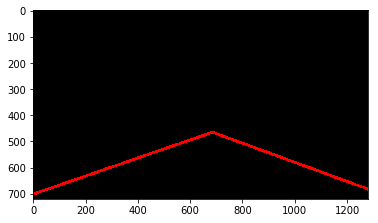

In [24]:
new_clip_output = 'test_output.mp4'
test_clip = VideoFileClip("/Users/vijayasarathibalasubramanian/Desktop/SDN/CarND-LaneLines-P1/challenge.mp4")
#new_clip = test_clip.fl_image(lambda x: cv2.cvtColor(x, cv2.COLOR_RGB2YUV)) #NOTE: this function expects color images!!
new_clip = test_clip.fl_image(process_image)
%time new_clip.write_videofile(new_clip_output, audio=False)

In [ ]:
HTML("""
<video width="640" height="300" controls>
  <source src="{0}" type="video/mp4">
</video>
""".format(new_clip_output))

In [126]:
#Reflection : lesson should have covered indepth details instead of just covering basics. it took sometime for me to
#understand the project need and functions needed to implement.
#i didnt get much time to write the code in a robust way. may be we can improve the code to handle multiple images 
#and videos at the same. we can do fill the space with color.